In [2]:
import numpy as np
import matplotlib.pyplot as plt

import histlite as hl

In [116]:
from scipy.interpolate import UnivariateSpline

In [152]:
rol = np.genfromtxt('/home/gerritr/ECAP/nsb_simulation/nsb_refactor/nsb/utils/assets/rolo.csv', delimiter=",")

FileNotFoundError: /home/gerritr/ECAP/nsb_simulation/nsb_refactor/utils/assets/rolo.csv not found.

In [15]:
def ln_A(p, g, s_sel):
    p_1, p_2, p_3, p_4 = 4.06054, 12.8802, np.deg2rad(-30.5858), np.deg2rad(16.7498)
    
    sum_a = p[0] + p[1]*g + p[2]*g**2 + p[3]*g**3
    sum_b = p[4]*s_sel + p[5]*s_sel**3 + p[6]*s_sel**5
    sum_c = p[7]*np.exp(-g/p_1) + p[8]*np.exp(-g/p_2) + p[9]*np.cos((g-p_3)/p_4)
    
    return sum_a + sum_b + sum_c

In [167]:
lam = []
res = []

for j in range(22):
    res.append(np.exp(ln_A(rol[j][1:], np.deg2rad(55), 0.1425)))

In [168]:
s = UnivariateSpline(rol[:22,0], np.asarray(res), k=2)
t = UnivariateSpline(np.log(rol[:22,0]), np.asarray(res), k=1)

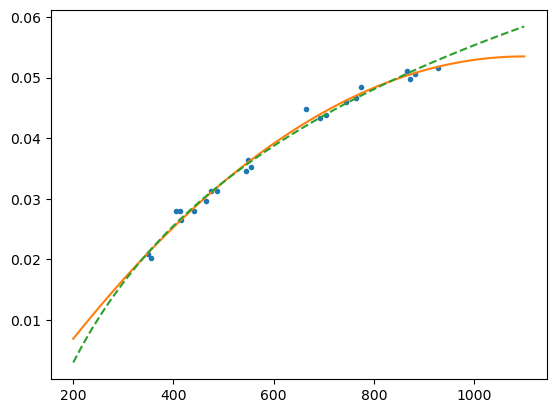

In [169]:
x = np.linspace(200,1100)

plt.plot(rol[:22,0], res, ".")
plt.plot(x, s(x))
plt.plot(x, t(np.log(x)), "--")

In [57]:
rol.shape

(25, 11)

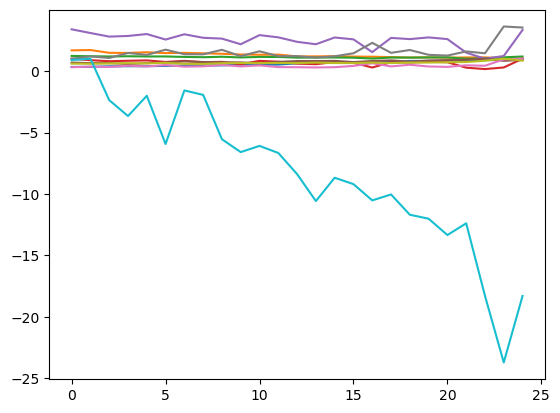

In [40]:
for i in range(10):
    plt.plot(rol[:,i]/np.max(rol[:,i]))

In [25]:
h = hl.Hist(ag[:,0], ag[:,1][:-1])

In [9]:
np.savetxt('airglow_130sfu_new.csv', s)

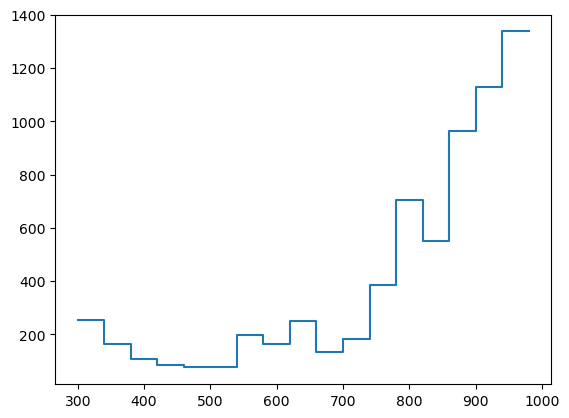

In [26]:
hl.plot1d(h)

In [7]:
s = np.genfromtxt('airglow_130sfu_new.csv')

In [8]:
s[:,1] = s[:,1]*4.255*1e7

In [5]:
s

array([[3.00000000e+02, 3.67647744e+08],
       [3.40000000e+02, 3.90640912e+09],
       [3.80000000e+02, 3.17648515e+09],
       [4.20000000e+02, 2.75236377e+09],
       [4.60000000e+02, 2.67327183e+09],
       [5.00000000e+02, 2.85924512e+09],
       [5.40000000e+02, 7.37655310e+09],
       [5.80000000e+02, 6.20915130e+09],
       [6.20000000e+02, 9.65199945e+09],
       [6.60000000e+02, 5.36044900e+09],
       [7.00000000e+02, 7.27034830e+09],
       [7.40000000e+02, 1.54776050e+10],
       [7.80000000e+02, 2.69725301e+10],
       [8.20000000e+02, 2.23299847e+10],
       [8.60000000e+02, 3.99235162e+10],
       [9.00000000e+02, 4.54523355e+10],
       [9.40000000e+02, 4.73730425e+10],
       [9.80000000e+02, 8.21814955e+10]])